In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazone-fine-food/Reviews.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import string

plt.style.use('ggplot')

In [3]:
import nltk

In [4]:
df = pd.read_csv("/kaggle/input/amazone-fine-food/Reviews.csv")

In [5]:
df.shape

(568454, 10)

In [6]:
df= df.head(1000)

In [7]:
df.shape

(1000, 10)

In [8]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
886,887,B000HDMUQ2,A2AV6EYCQ5OA30,grandMOM,0,0,3,1267142400,Be Very Berry Wary.,"They are OK, but my husband only eats them whe..."
556,557,B000G6RYNE,APA1GLNHF6K9H,"Godess MOM ""Goddess MOM""",0,5,1,1226880000,They're Not Madhouse Munchies!!!,DEfintely not as tasty as the Madhouse Munchie...
396,397,B001ELL6O8,A1PTPN5SY7C7SW,Leonard Kocurek,1,1,5,1215648000,Great mix,Arrowhead Mills Buttermilk Pancake mix is my f...
639,640,B001EPPFGO,A1RZ4VH27NLDGS,"Jeremy Morgan ""A good book on your shelf is a...",0,0,5,1334534400,What a great tea at this price,This is a delicious tea!<br /><br />I'm just n...
24,25,B001GVISJM,A22P2J09NJ9HKE,"S. Cabanaugh ""jilly pepper""",0,0,5,1295481600,Please sell these in Mexico!!,"I have lived out of the US for over 7 yrs now,..."


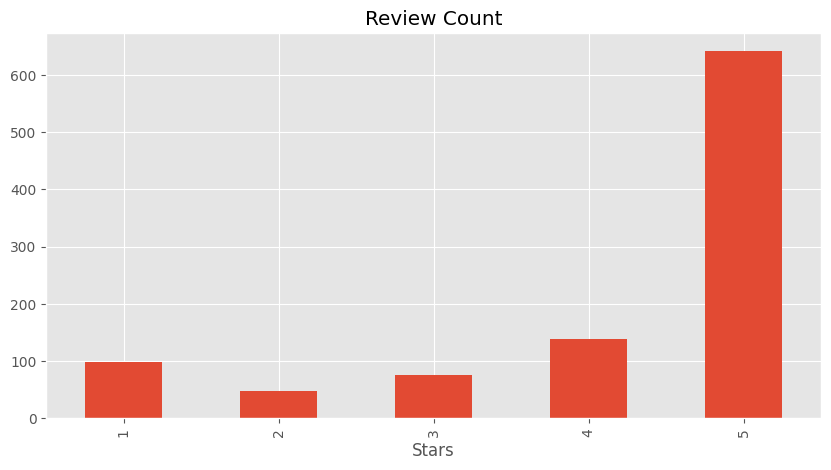

In [9]:
ax=df['Score'].value_counts().sort_index() \
    .plot(kind = 'bar',
          title="Review Count",
          figsize=(10,5))
ax.set_xlabel('Stars')
plt.show()

In [10]:
example=df["Text"][10]

## Data Preprocessing 

In [11]:
#converting text into lowercase
df['Text']=df['Text'].str.lower()

In [12]:
#Removing html tags
def remove_tags(text):
    pattern= re.compile(r"<.*?>")
    data= pattern.sub('',text)
    return data
    
    

In [13]:
df['Text']=df['Text'].apply(remove_tags)

In [14]:
df['Text'][10]

"i don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  when we realized that we simply couldn't find it anywhere in our city we were bummed.now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.if you love hot sauce..i mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of tequila picante gourmet de inclan.  just realize that once you taste it, you will never want to use any other sauce.thank you for the personal, incredible service!"

In [15]:
#Removing punctuations 
exclude= string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans("","",exclude))


In [16]:
df['Text']=df['Text'].apply(remove_pun)

In [17]:
df['Text'][10]

'i dont know if its the cactus or the tequila or just the unique combination of ingredients but the flavour of this hot sauce makes it one of a kind  we picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away  when we realized that we simply couldnt find it anywhere in our city we were bummednow because of the magic of the internet we have a case of the sauce and are ecstatic because of itif you love hot saucei mean really love hot sauce but dont want a sauce that tastelessly burns your throat grab a bottle of tequila picante gourmet de inclan  just realize that once you taste it you will never want to use any other saucethank you for the personal incredible service'

## VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [46]:
sentiment.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [19]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid= row['Id']
    res[myid]=sentiment.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns={'index': 'Id'})
new_df = new_df.merge(df, how='left')

In [21]:
new_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...


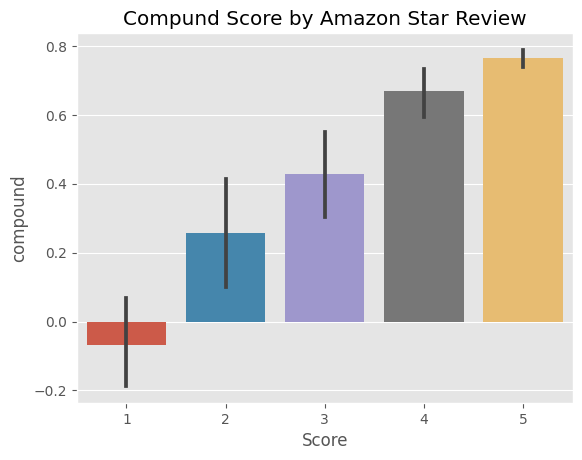

In [24]:
ax = sns.barplot(data=new_df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [25]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [27]:
roberta_model=pipeline("text-classification",model=model,tokenizer=tokenizer)

In [32]:
roberta_model(example)

[{'label': 'LABEL_2', 'score': 0.9098215103149414}]

In [49]:
def run_model(text):
    roberta_model=pipeline("text-classification",model=model,tokenizer=tokenizer)
    res = roberta_model(text)
    if res[0]['label'] =='LABEL_2':
        res[0]['label']="Positive"
    elif res[0]['label'] == 'LABEL_0':
        res[0]['label']="Negative"
    elif res[0]['label'] == 'LABEL_1':
        res[0]['label']="Neutral"
        
    result={
        'label': res[0]['label'],
        'score': res[0]['score']
    }
        
    return result
        
        
      

In [50]:
run_model(example)

{'label': 'Positive', 'score': 0.9098215103149414}